In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from scipy.special import gamma, perm, softmax, factorial
import matplotlib.pyplot as plt

### Define Functions

$\operatorname{Dir}(\boldsymbol{\mu} \mid \boldsymbol{\alpha})=\frac{\Gamma\left(\alpha_{0}\right)}{\Gamma\left(\alpha_{1}\right) \cdots \Gamma\left(\alpha_{K}\right)} \prod_{k=1}^{K} \mu_{k}^{\alpha_{k}-1}$
where $\Gamma(x)$ is the gamma function and $\alpha_{0}=\sum_{k=1}^{K} \alpha_{k}$

$\operatorname{Mult}(\boldsymbol{m} \mid \boldsymbol{\mu}, N)=\left(\begin{array}{c}
N \\
m_{1} m_{2} \cdots m_{K}
\end{array}\right) \prod_{k=1}^{K} \mu_{k}^{m_{k}}$, $\boldsymbol m, N$이 주어지고, $\mu$에 대한 함수임에 주의!!!

In [2]:
# Prior Distribution
def Dir(mu, alpha):
    # mu : (mu1, mu2, mu3, ..., muK)
    # alpha : (alpha1, alpha2, alpha3, ..., alphaK)
    
    norm_factor = sum(alpha) / np.prod(gamma(alpha))
    return norm_factor * np.prod(mu ** (alpha-1), axis=1)

# As Likelihood Function, Note that likelihood function is not a probability distribution
def Multinomial(mu, m):
    # mu : a domain vector
    # m : a vector of the number of times each events has occured.
    
    return perm(factorial(np.sum(m)), np.prod(factorial(m))) * np.prod(mu ** m, axis=1)

### Sample domain values and get prior, likehood & posterior

In [3]:
# Sample 100,000 domain values from 3-simplex (x1+x2+x3=1).
# shape : (100000, 3)
X = np.array([softmax(np.random.normal(size=3)) for _ in range(100000)])

# Set a prior and a likelihood function.
# (100000,)
prior = Dir(X, np.array([2, 1, 1]))
# (100000,)
likelihood = Multinomial(X, np.array([1, 2, 2]))

# Find the normalized posterior by multiplying the prior and the likelihood
# (100000,)
unnormed_posterior = prior * likelihood

# Find the normalized posterior
# (100000,)
normed_posterior = Dir(X, np.array([3, 3, 3]))

### Plot prior, likelihood & posterior.

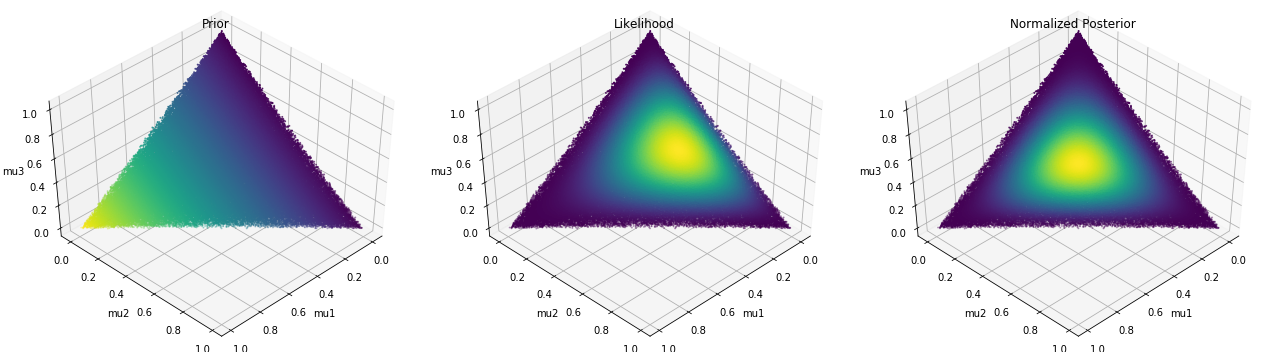

In [4]:
fig = plt.figure(figsize=[18, 5])
ax = fig.add_subplot(131, projection='3d')
plt.title('Prior')
ax.view_init(45, 45)
p = ax.scatter(X[:, 0], X[:, 1], X[:, 2], s=1, c=prior)
ax.set_xlabel('mu1'), ax.set_ylabel('mu2'), ax.set_zlabel('mu3')
#fig.colorbar(p)

ax = fig.add_subplot(132, projection='3d')
plt.title('Likelihood')
ax.view_init(45, 45)
p = ax.scatter(X[:, 0], X[:, 1], X[:, 2], s=1, c=likelihood)
ax.set_xlabel('mu1'), ax.set_ylabel('mu2'), ax.set_zlabel('mu3')

ax = fig.add_subplot(133, projection='3d')
plt.title('Normalized Posterior')
ax.view_init(45, 45)
p = ax.scatter(X[:, 0], X[:, 1], X[:, 2], s=1, c=normed_posterior)
ax.set_xlabel('mu1'), ax.set_ylabel('mu2'), ax.set_zlabel('mu3')

plt.tight_layout()
plt.show()